In [38]:
import pyreadr
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import numpy as np
import random


pd.set_option('display.max_column', None)


In [2]:
shapefile_path_ =  "./data/shape_file.shp"
data_file_path = "./data/output_revised.csv"

In [3]:
df = pd.read_csv(data_file_path)


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [5]:
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


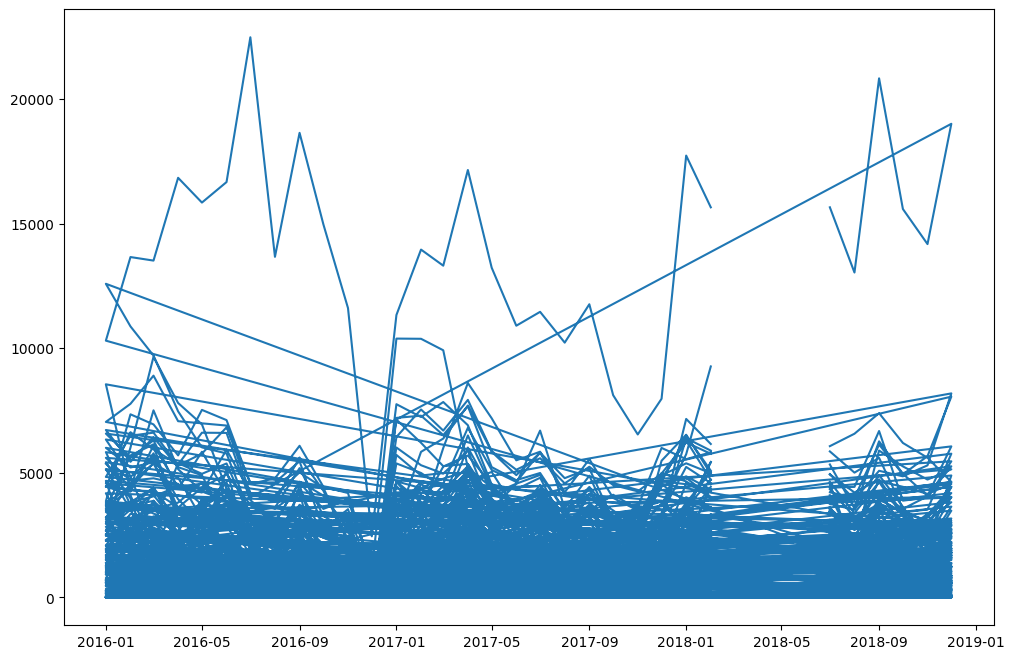

In [6]:
plt.figure(figsize=(12,8))
plt.plot(df['datetime'], df['malaria_cases_u5']);

In [7]:
df.head()

,district,year,month,district_SPH,malaria_cases_u5,diarr_cases_u5,population,tmin,tmax,RH,precipitation,ndvi,ADM1_PT,ADM2_PT,ADM2_PCODE,ID,prop_poor,prop_Number_of_children_3plus,prop_Rural,prop_drinking_TreatedWater,prop_Time_get_Water60_plus_min,prop_No_Toilet,prop_Has_Electricity,prop_Has_Radio,prop_floor_Material_natural,prop_Sleeping_Rooms_3plus,prop_share_Toilet,prop_Has_sleeping_mosquito_net,prop_some_or_all_children_slept_under_net_last_night,prop_house_holds_share_toilet_9Plus,prop_Has_mobilephone,prop_dwelling_sprayed_last_12_Months,prop_with_3Plus_mosquito_nets,prop_children_under_mosquito_bed_nets_previous_night2Plus,prop_uneducated,number_of_doctors,Name_of_healthcare_facility1,datetime
0,alto molocue,2016,1,alto molocue,5361.0,361.0,398318.033138,21.294078,30.052979,84.781250,316.312258,0.249722,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-01-01
1,alto molocue,2016,2,alto molocue,4417.0,213.0,398318.033138,21.270510,29.678297,87.459821,129.972256,0.323964,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-02-01
2,alto molocue,2016,3,alto molocue,5778.0,193.0,398318.033138,22.023369,29.522761,89.664286,354.284895,0.312545,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-03-01
3,alto molocue,2016,4,alto molocue,3573.0,92.0,398318.033138,19.596098,26.568178,90.843750,85.360640,0.289376,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-04-01
4,alto molocue,2016,5,alto molocue,3306.0,124.0,398318.033138,16.402166,25.480120,85.982143,0.818778,0.298299,Zambezia,Alto Molocue,MZ1101,1,30.82,0.0,77.98,17.64,0.0,21.76,31.65,37.42,0,1.76,14.29,85.55,0,0.0,69.29,1.76,1.76,0.0,13.33,2433.0,17.0,2016-05-01


In [12]:
df.isnull().sum()[df.isnull().sum().values > 0].sort_values(ascending=False)

district_SPH                    790
malaria_cases_u5                636
diarr_cases_u5                  636
number_of_doctors               180
Name_of_healthcare_facility1    180
ndvi                             68
tmin                             36
tmax                             36
dtype: int64

#### Data Splitting:

In [15]:
df['year'].unique()

array([2016, 2017, 2018], dtype=int64)

In [17]:
# data from 2018-03 - 2018-06 would be the test set & then data from 2018-07 - ... would be the hold out eval set.

In [18]:
df['datetime']

0      2016-01-01
1      2016-02-01
2      2016-03-01
3      2016-04-01
4      2016-05-01
          ...    
5719   2018-08-01
5720   2018-09-01
5721   2018-10-01
5722   2018-11-01
5723   2018-12-01
Name: datetime, Length: 5724, dtype: datetime64[ns]

In [20]:
train_data = df[df['datetime'] < '2018-03-01'].reset_index()
test_data = df[(df['datetime'] >= '2018-03-01') & (df['datetime'] <= '2018-06-01')].reset_index()
eval_data = df[df['datetime'] > '2018-06-01'].reset_index()

In [22]:
train_data['datetime'].max()

Timestamp('2018-02-01 00:00:00')

In [24]:
print(f"Number of districts in Train data: {train_data['district'].nunique()},\nTest data: {test_data['district'].nunique()}, \nValidation_data: {eval_data['district'].nunique()}")

Number of districts in Train data: 159,
Test data: 159, 
Validation_data: 159


In [36]:
# plotting data:
district = 'alto molocue'

def plot_series(ax, district):
    # plt.figure(figsize=(12,8))
    ax.plot(train_data[train_data['district'] == district]['datetime'], train_data[train_data['district'] == district]['malaria_cases_u5'], label='Train data')
    ax.plot(eval_data[eval_data['district'] == district]['datetime'], eval_data[eval_data['district'] == district]['malaria_cases_u5'], label='Eval data')
    ax.set_title(f"district: {district}")
    ax.legend()
    ax.tick_params(axis='x', rotation=45) ;


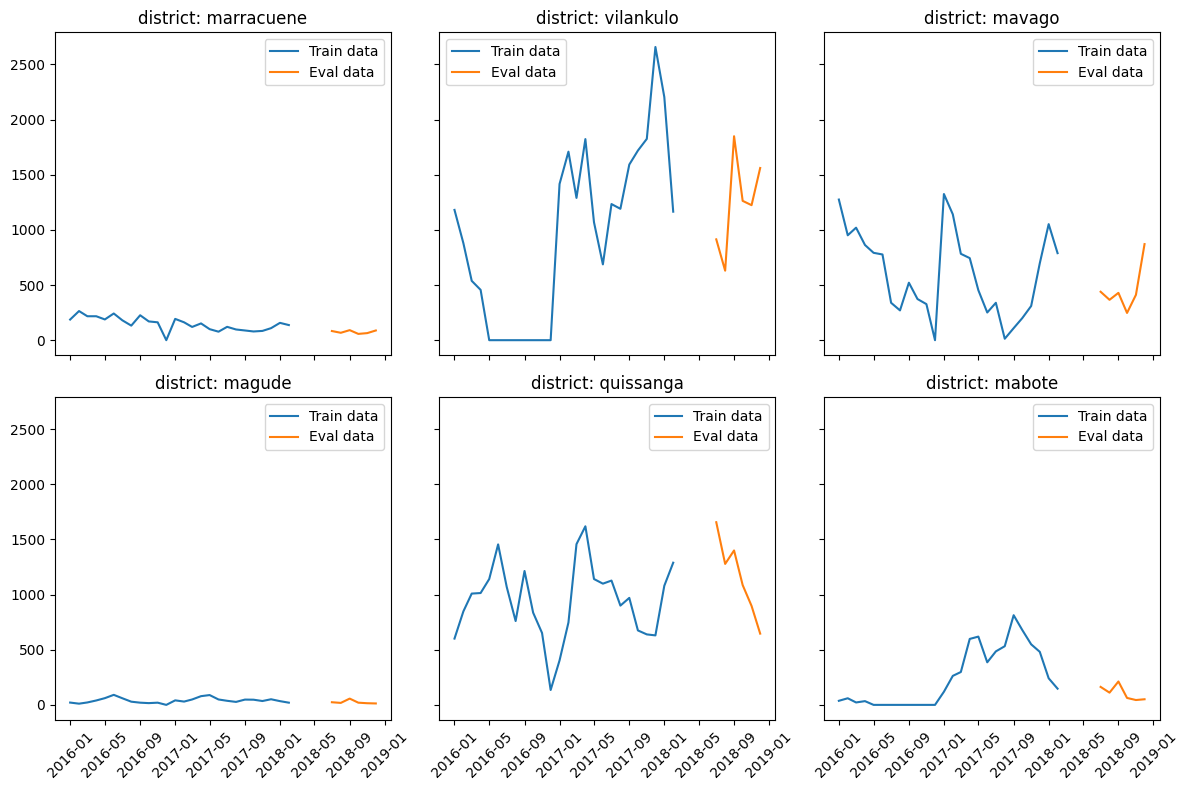

In [41]:
def plot_all_districts(districts, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8),  sharex=True, sharey=True)
    axes = axes.flatten()  
    
    for i, district in enumerate(districts):
        if i < len(axes):  
            plot_series(axes[i], district)
        else:
            axes[i].axis('off')  

    plt.tight_layout()
    plt.show()

districts = random.sample(list(train_data['district'].unique()), 6)
plot_all_districts(districts, nrows=2, ncols=3)

### Trying out interpolation:

In [45]:
check_df = df.copy()

In [59]:
check_df['interpolated'] = check_df.groupby('district')['malaria_cases_u5'].apply(
    lambda group: group.interpolate(method='polynomial', order=3)
).reset_index(level=0, drop=True)

In [48]:
check_df['district'].unique()

array(['alto molocue', 'ancuabe', 'angoche', 'angonia', 'balama', 'barue',
       'bilene', 'boane', 'buzi', 'cahora bassa', 'caia', 'changara',
       'chemba', 'cheringoma', 'chibabava', 'chibuto', 'chicualacuala',
       'chifunde', 'chigubo', 'chimbonila', 'chinde', 'chiure', 'chiuta',
       'chokwe', 'chongoene', 'cidade da beira', 'cidade da matola',
       'cidade de chimoio', 'cidade de inhambane', 'cidade de lichinga',
       'cidade de maputo', 'cidade de nampula', 'cidade de pemba',
       'cidade de quelimane', 'cidade de tete', 'cidade de xai-xai',
       'cuamba', 'derre', 'doa', 'dondo', 'erati', 'funhalouro', 'gile',
       'gondola', 'gorongosa', 'govuro', 'guija', 'guro', 'gurue',
       'homoine', 'ibo', 'ile', 'ilha de moçambique', 'ilha licom',
       'ilha risunodo', 'inharrime', 'inhassoro', 'inhassunge', 'jangamo',
       'lago', 'lago niassa', 'lalaua', 'larde', 'limpopo', 'liúpo',
       'luabo', 'lugela', 'mabalane', 'mabote', 'macanga', 'macate',
       'ma

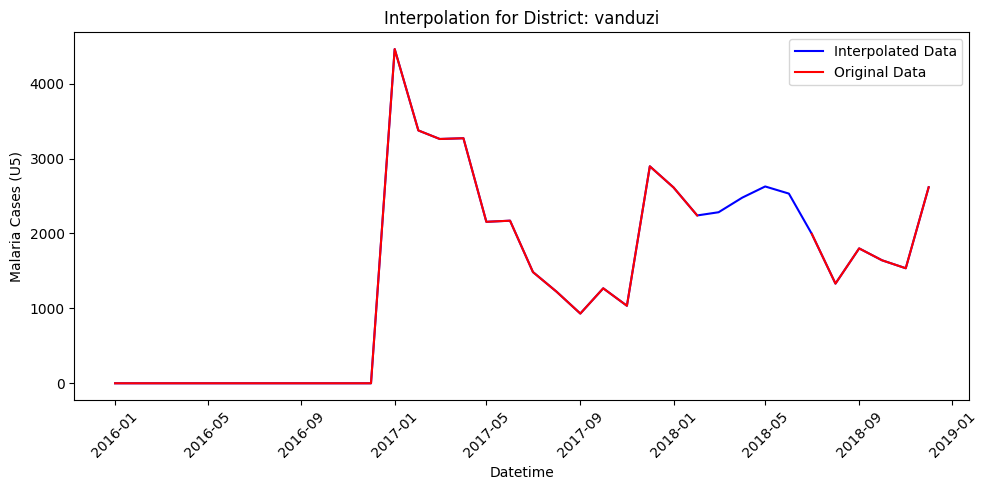

In [61]:
district = 'vanduzi'  
district_data = check_df[check_df['district'] == district]

plt.figure(figsize=(10, 5))
plt.plot(district_data['datetime'], district_data['interpolated'], label='Interpolated Data', color='blue')
plt.plot(district_data['datetime'], district_data['malaria_cases_u5'], label='Original Data', color='red')
plt.title(f"Interpolation for District: {district}")
plt.xlabel('Datetime')
plt.ylabel('Malaria Cases (U5)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
def plot_interpolated_series(ax, district):
    # plt.figure(figsize=(12,8))
    district_data = check_df[check_df['district'] == district]

    ax.plot(district_data['datetime'], district_data['interpolated'], label='Interpolated Data', color='blue')
    ax.plot(district_data['datetime'], district_data['malaria_cases_u5'], label='Original Data', color='red')
    ax.set_title(f"district: {district}")
    ax.legend()
    ax.tick_params(axis='x', rotation=45) ;


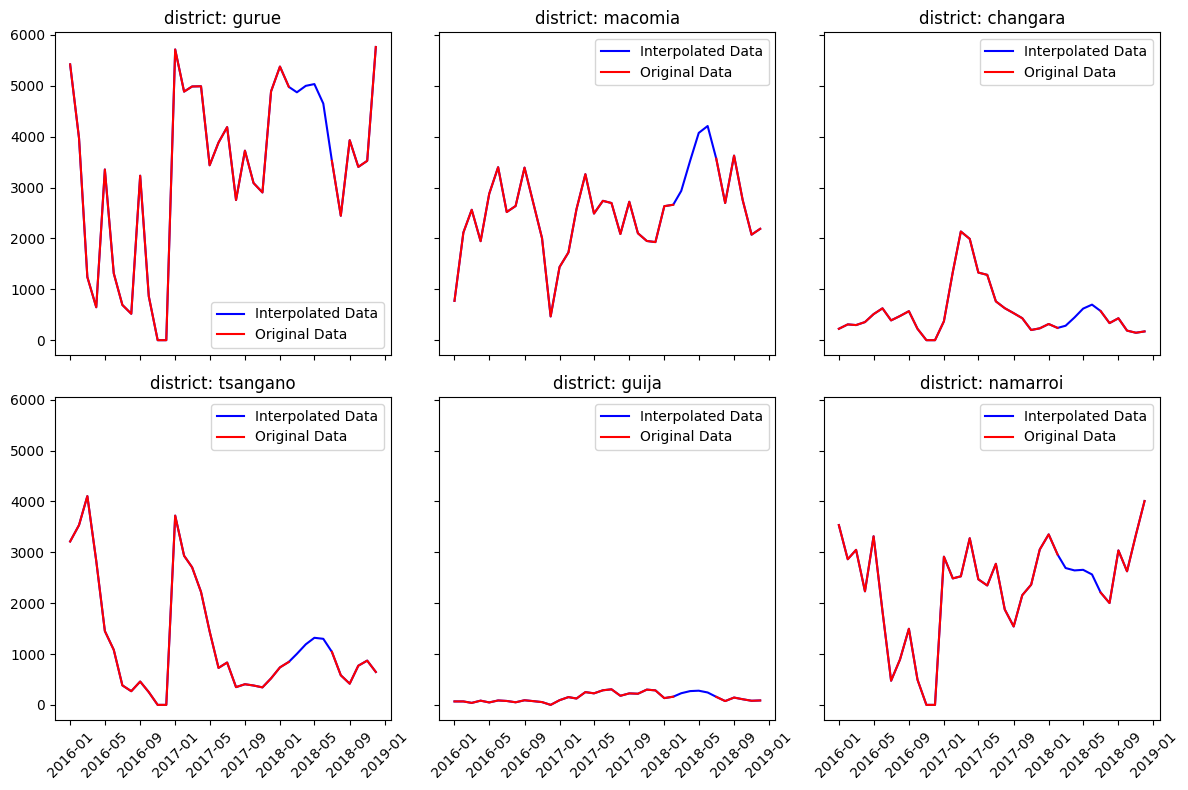

In [64]:
def plot_all_districts_interpol(districts, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8),  sharex=True, sharey=True)
    axes = axes.flatten()  
    
    for i, district in enumerate(districts):
        if i < len(axes):  
            plot_interpolated_series(axes[i], district)
        else:
            axes[i].axis('off')  

    plt.tight_layout()
    plt.show()

districts = random.sample(list(train_data['district'].unique()), 6)
plot_all_districts_interpol(districts, nrows=2, ncols=3)

In [88]:
## investigating how well  interpolation worked:

probability_of_nan = 0.3  

check_df['simulate_missing_malaria'] = check_df['malaria_cases_u5'].apply(
    lambda x: x if np.random.rand() > probability_of_nan else np.nan
)

In [89]:
check_df['simulated_interpolated'] = check_df.groupby('district')['simulate_missing_malaria'].apply(
    lambda group: group.interpolate(method='polynomial', order=3)
).reset_index(level=0, drop=True)

In [90]:
check_df['quadratic_interpolated'] = check_df.groupby('district')['simulate_missing_malaria'].apply(
    lambda group: group.interpolate(method='quadratic')
).reset_index(level=0, drop=True)

In [91]:
check_df['linear_interpolated'] = check_df.groupby('district')['simulate_missing_malaria'].apply(
    lambda group: group.interpolate(method='linear')
).reset_index(level=0, drop=True)

In [96]:
def plot_simulated_interpolated_series(ax, district):
    # plt.figure(figsize=(12,8))
    district_data = check_df[check_df['district'] == district]

    ax.plot(district_data['datetime'], district_data['simulated_interpolated'], label='Interpolated Data', color='blue')
    ax.plot(district_data['datetime'], district_data['quadratic_interpolated'], label='quadratic Interpolated Data', color='k')
    # ax.plot(district_data['datetime'], district_data['linear_interpolated'], label='Linear Interpolated Data', color='yellow')


    # ax.plot(district_data['datetime'], district_data['simulate_missing_malaria'], label='Simulated Missing Values', color='green')

    ax.plot(district_data['datetime'], district_data['malaria_cases_u5'], label='Original Data', color='red')
    ax.set_title(f"district: {district}")
    ax.legend()
    ax.tick_params(axis='x', rotation=45) ;


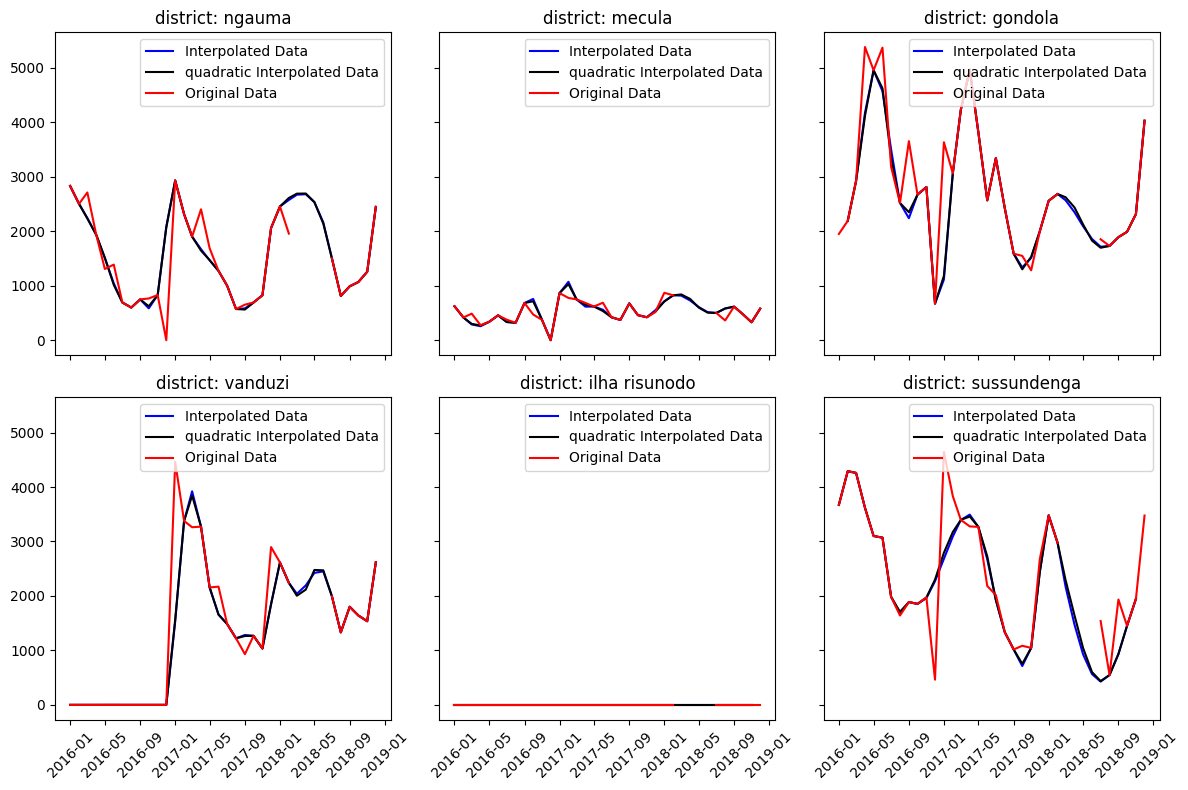

In [97]:
def plot_all_districts_interpol(districts, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8),  sharex=True, sharey=True)
    axes = axes.flatten()  
    
    for i, district in enumerate(districts):
        if i < len(axes):  
            plot_simulated_interpolated_series(axes[i], district)
        else:
            axes[i].axis('off')  

    plt.tight_layout()
    plt.show()

districts = random.sample(list(train_data['district'].unique()), 6)
plot_all_districts_interpol(districts, nrows=2, ncols=3)